# INTERNSAY Internship

## Name: Mohammad Wasiq

## Email: mohammadwasiq0786@gmail,com

## LinkedIn: https://www.linkedin.com/in/mohammadwasiq0/

## GitHub:https://github.com/mohammadwasiq0/

# Graduate Admissions Prediction

In [2]:
# Load the require libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

In [3]:
# Load the dataset

df= pd.read_csv("Admission_Predict.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
df.shape

(400, 8)

In [5]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [7]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,400.0,200.500000,115.614301,1.00,100.75,200.50,300.2500,400.00
GRE Score,400.0,316.807500,11.473646,290.00,308.00,317.00,325.0000,340.00
TOEFL Score,400.0,107.410000,6.069514,92.00,103.00,107.00,112.0000,120.00
University Rating,400.0,3.087500,1.143728,1.00,2.00,3.00,4.0000,5.00
SOP,400.0,3.400000,1.006869,1.00,2.50,3.50,4.0000,5.00
LOR,400.0,3.452500,0.898478,1.00,3.00,3.50,4.0000,5.00
CGPA,400.0,8.598925,0.596317,6.80,8.17,8.61,9.0625,9.92
Research,400.0,0.547500,0.498362,0.00,0.00,1.00,1.0000,1.00
Chance of Admit,400.0,0.724350,0.142609,0.34,0.64,0.73,0.8300,0.97


In [9]:
df.drop(columns=['Serial No.'], inplace=True)
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

/tmp/ipykernel_254/1324316109.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GRE Score'], kde=False)


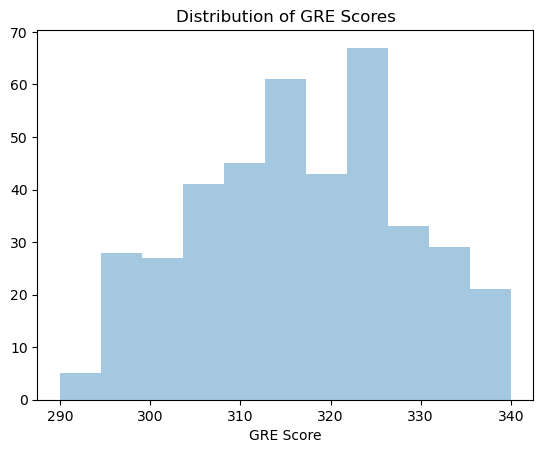

In [11]:
sns.distplot(df['GRE Score'], kde=False)
plt.title("Distribution of GRE Scores")
plt.show()

/tmp/ipykernel_254/3043049100.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TOEFL Score'], kde=False)


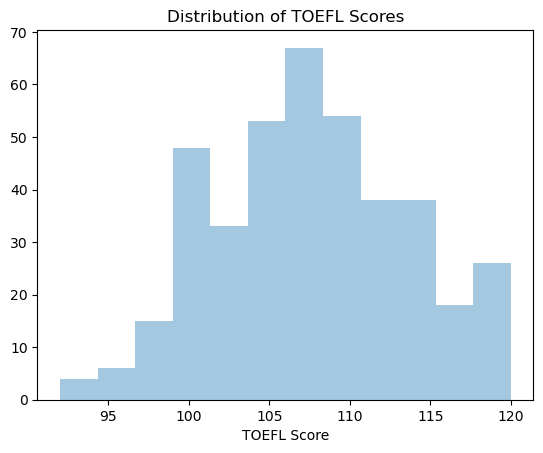

In [12]:
sns.distplot(df['TOEFL Score'], kde=False)
plt.title("Distribution of TOEFL Scores")
plt.show()

/tmp/ipykernel_254/3751757161.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['University Rating'], kde=False)


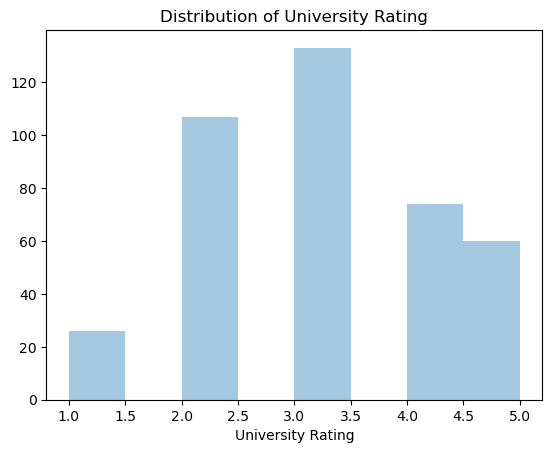

In [13]:
sns.distplot(df['University Rating'], kde=False)
plt.title("Distribution of University Rating")
plt.show()

/tmp/ipykernel_254/596680505.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SOP'], kde=False)


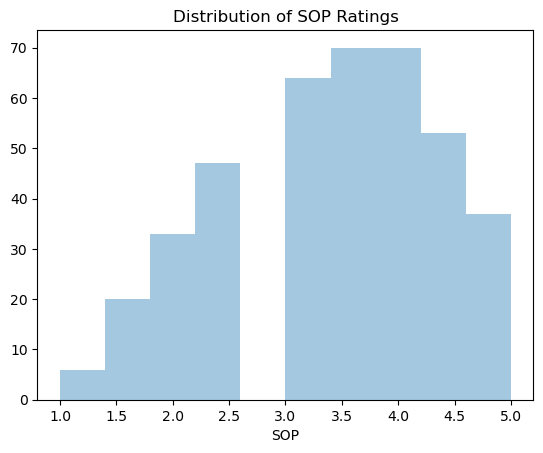

In [14]:
sns.distplot(df['SOP'], kde=False)
plt.title("Distribution of SOP Ratings")
plt.show()

/tmp/ipykernel_254/353810378.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CGPA'], kde=False)


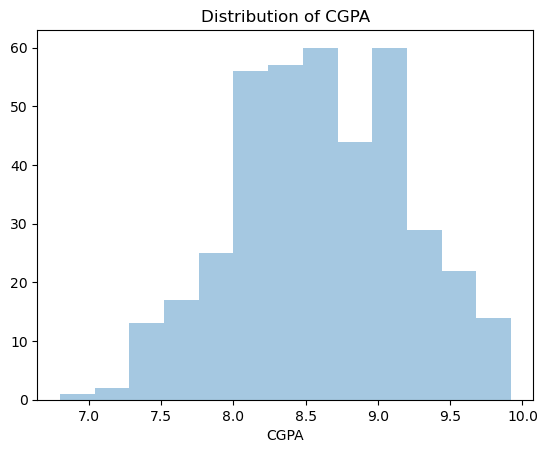

In [15]:
sns.distplot(df['CGPA'], kde=False)
plt.title("Distribution of CGPA")
plt.show()

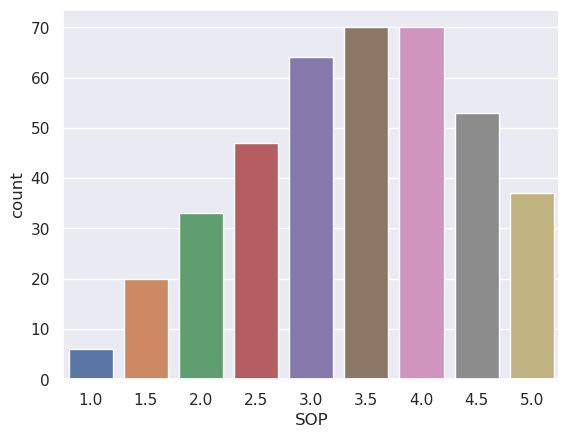

In [18]:
sns.countplot(x='SOP',data=df)
plt.show()

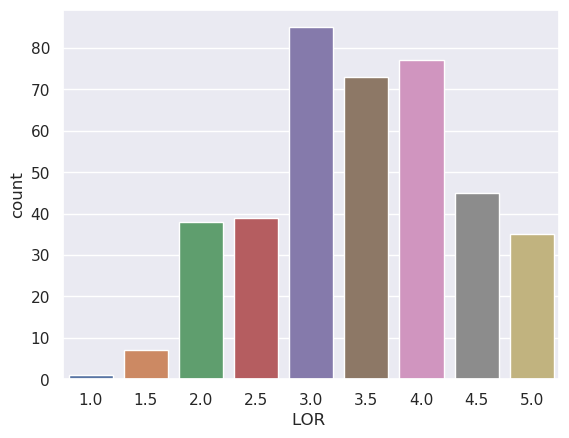

In [19]:
sns.countplot(x='LOR ',data=df)
plt.show()

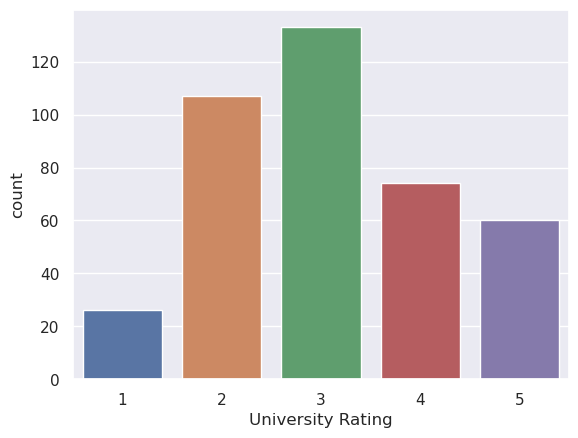

In [21]:
sns.countplot(x='University Rating',data=df)
plt.show()

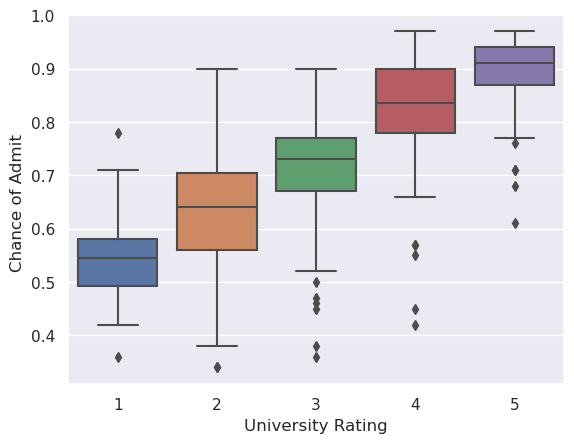

In [23]:
sns.boxplot(x='University Rating',y='Chance of Admit ',data=df)
plt.show()

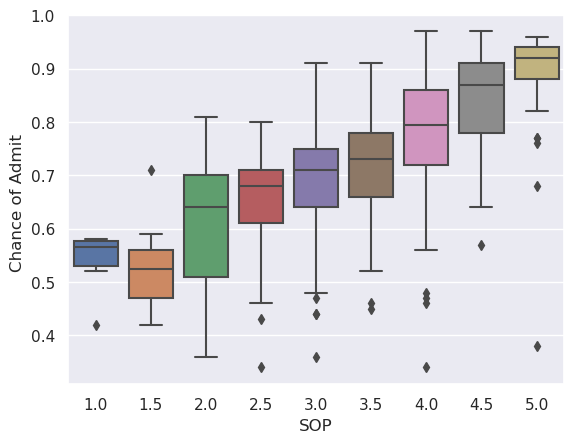

In [24]:
sns.boxplot(x='SOP',y='Chance of Admit ',data=df)
plt.show()

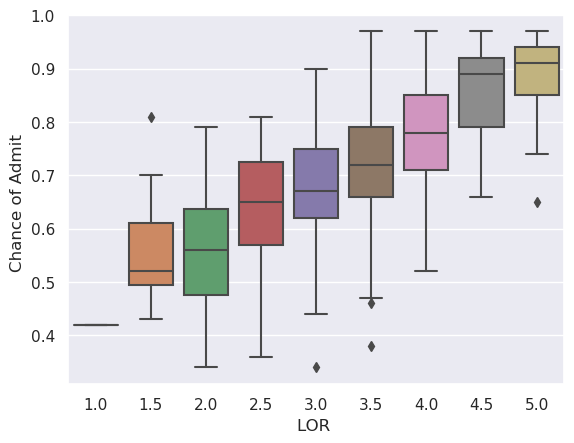

In [25]:
sns.boxplot(x='LOR ',y='Chance of Admit ',data=df)
plt.show()

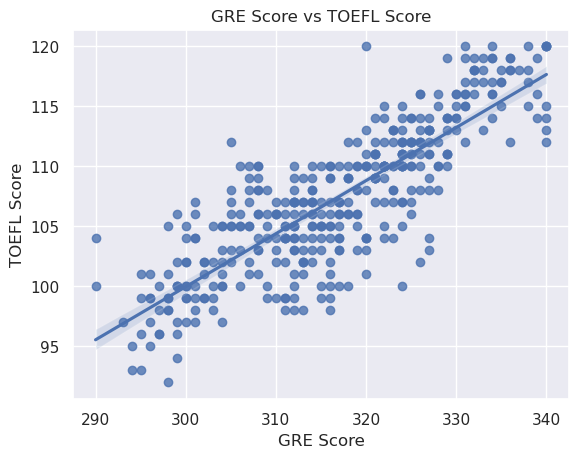

In [26]:
sns.regplot(x="GRE Score", y="TOEFL Score", data=df)
plt.title("GRE Score vs TOEFL Score")
plt.show()

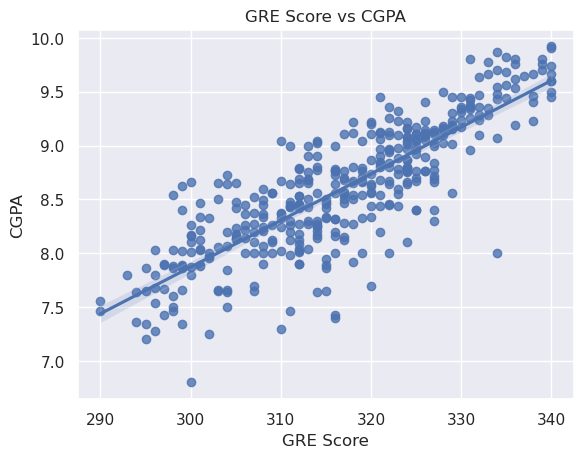

In [27]:
sns.regplot(x="GRE Score", y="CGPA", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

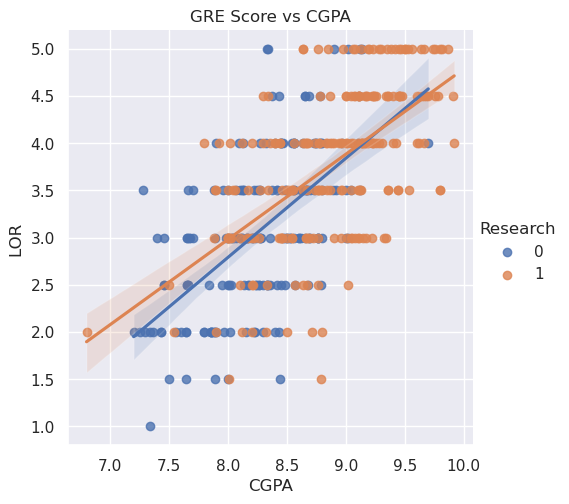

In [28]:
sns.lmplot(x="CGPA", y="LOR ", data=df, hue="Research")
plt.title("GRE Score vs CGPA")
plt.show()

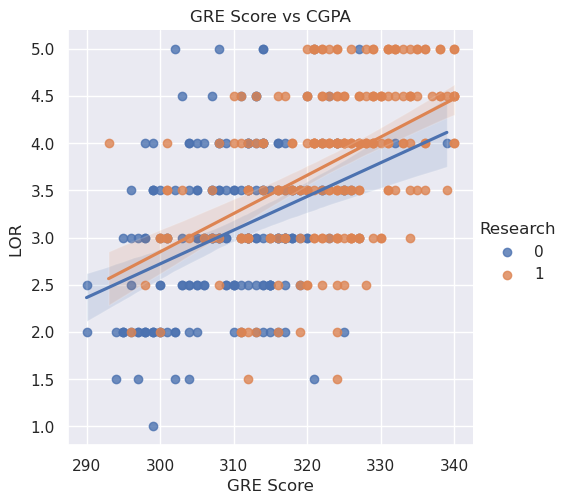

In [29]:
sns.lmplot(x="GRE Score", y="LOR ", data=df, hue="Research")
plt.title("GRE Score vs CGPA")
plt.show()

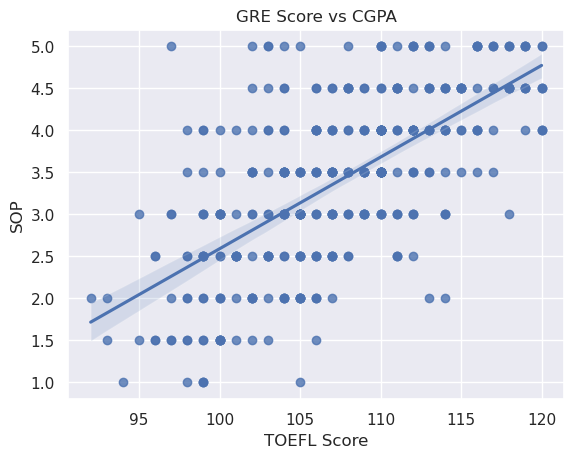

In [31]:
sns.regplot(x="TOEFL Score", y="SOP", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

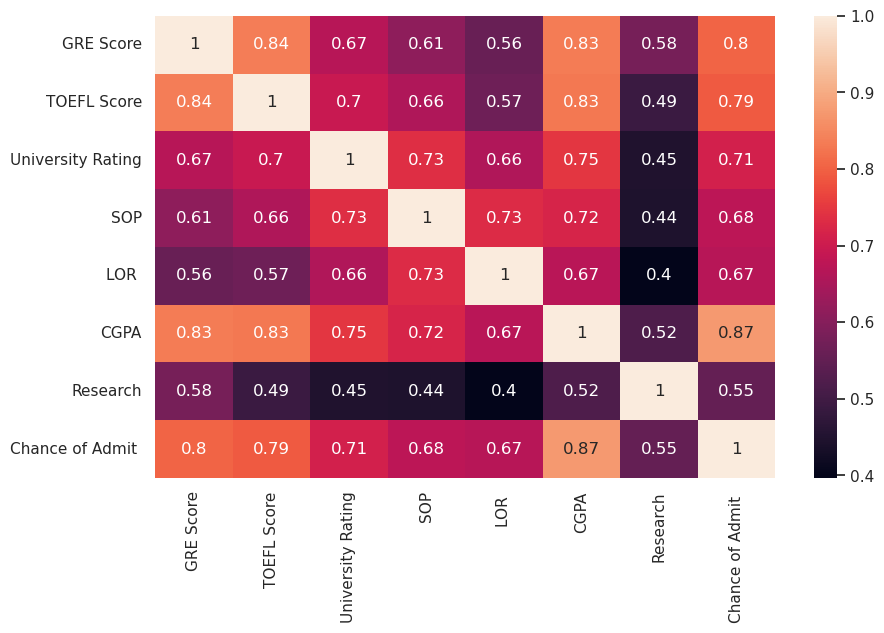

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

### 

## Train Test Split

In [37]:
# splitting the Label (Chance of Admit) and features
y = df['Chance of Admit ']
x = df.drop(columns=['Chance of Admit '])

In [44]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [45]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [46]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x, y, test_size= 0.33, random_state= 10)

In [47]:
x_train.shape,  y_train.shape

((268, 7), (268,))

In [48]:
x_test.shape, y_test.shape

((132, 7), (132,))

In [49]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
157,309,104,2,2.0,2.5,8.26,0
236,325,112,4,4.0,4.5,9.17,1
147,326,114,3,3.0,3.0,9.11,1
275,322,110,3,3.5,3.0,8.96,1
318,324,111,3,2.5,2.0,8.80,1
...,...,...,...,...,...,...,...
369,301,98,1,2.0,3.0,8.03,1
320,317,106,3,4.0,3.5,8.50,1
15,314,105,3,3.5,2.5,8.30,0
125,300,100,3,2.0,3.0,8.66,1


In [50]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [51]:
# importing StandardScaler from sklearn library

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [52]:
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

## Model Fitting

In [53]:
lr = LinearRegression()
lr

LinearRegression()

In [54]:
lr.fit(x_train,y_train)

LinearRegression()

In [55]:
lr.coef_

array([ 0.02413536,  0.01277818,  0.01101656, -0.00501995,  0.01935619,
        0.07643717,  0.004243  ])

In [56]:
lr.intercept_ 

0.723134328358209

In [58]:
lr.predict(x_test)

array([0.63910271, 0.77161239, 0.61099846, 0.52332879, 0.55400412,
       0.65478278, 0.95515044, 0.92230524, 0.90088563, 0.69545456,
       0.79803142, 0.85434431, 0.72771584, 0.58753347, 0.96554279,
       0.9101274 , 0.48774157, 0.80013166, 0.85389316, 0.78334886,
       0.9587844 , 0.77688948, 0.78328956, 0.71867205, 0.7191659 ,
       0.71774263, 0.62006423, 0.94888313, 0.63625636, 0.73711838,
       0.80850416, 0.70578643, 0.75609097, 0.77706788, 0.6139223 ,
       0.86480734, 0.51758981, 0.62136066, 0.7827426 , 0.80441793,
       0.91174931, 0.83368639, 0.80332799, 0.54186612, 0.67534977,
       0.72864805, 0.7059119 , 0.67738779, 0.5696253 , 0.85663825,
       0.84154694, 0.68757834, 0.91832106, 0.89258377, 0.47742757,
       0.61803263, 0.74578271, 0.65482424, 0.67395408, 0.68278439,
       0.62490523, 0.82373388, 0.76147093, 0.7893152 , 0.68353811,
       0.87062807, 0.83455789, 0.68900185, 0.89983205, 0.71461013,
       0.9394966 , 0.84527391, 0.79991129, 0.63129725, 0.70575

In [59]:
lr.predict([[337.000000,118.0,4.0,4.5,4.5,9.65,1]])

array([11.21501666])

In [61]:
# standardization of prediction is done

lr.predict(scaler.transform([[337.000000,118.0,4.0,4.5,4.5,9.65,1]]))

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0.95556145])

In [62]:
#calculating accuracy score of the test set - R squared (R^2)

lr.score(x_test,y_test)

0.755966329076346

In [63]:
# creating a function for Adjusted R squared
    
def adj_r2(x,y):
    r2 = lr.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

adj_r2(x_train,y_train)

0.8161245726827591

## Regularization

In [64]:
#LassoCV with cross validation used to find the best parameter (dataset has been split into 10 sets equally with 9 for train and 1 for test in rotation)

lassocv = LassoCV(alphas=None,cv=10,max_iter=2000000,normalize=True)
lassocv.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


LassoCV(cv=10, max_iter=2000000, normalize=True)

In [65]:
#alpha value - (lambda value in the equation)

lassocv.alpha_

8.945353176924566e-05

In [66]:
#lasso

lasso = Lasso(alpha=lassocv.alpha_)
lasso.fit(x_train,y_train)

Lasso(alpha=8.945353176924566e-05)

In [67]:
#model accuracy

lasso.score(x_test,y_test)

0.7560159956304641

In [69]:
#RidgeCV model building with 10cv

ridgecv = RidgeCV(alphas=(0.1,1.0,10.0),cv = 10,normalize=True)
ridgecv.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pip

RidgeCV(cv=10, normalize=True)

In [ ]:
#better alpha value

ridgecv.alpha_

In [ ]:
#ridge

ridge = Ridge(alpha=ridgecv.alpha_)
ridge.fit(x_train,y_train)

In [ ]:
#model accuracy

ridge.score(x_test,y_test)

In [ ]:
#elastic model building with same 10 cv

elasticcv = ElasticNetCV(alphas=None,cv=10)
elasticcv.fit(x_train,y_train)

In [ ]:
#alpha value

elasticcv.alpha_

In [ ]:
#l1 ratio - lambda value

elasticcv.l1_ratio_

In [ ]:
#elastic model building

elastic = ElasticNet(alpha=elasticcv.alpha_,l1_ratio=elasticcv.l1_ratio_)
elastic.fit(x_train,y_train)

In [ ]:
#model accuracy

elastic.score(x_test,y_test)

### Suggestion 
- For better chance of admit we can recommend student some good GRE and TOEFL study material as it is really important for having the good score there.
- We can even give awareness to student to study hard and get more CGPA during their under-graduation as it will impact the chance of admit significantly.
- Research is a good add on with some good research recommendation which students can perform during undergraduation can help them boost their profile.
- As well as with good CGPA and research the student might also get good LOR which again will boost the chance of admit.